# Import packages

In [1]:
import warnings
import scirpy as ir
warnings.simplefilter(action='ignore', category=FutureWarning)
from mousipy import translate
import numpy as np
import scanpy as sc
import pandas as pd
from matplotlib import pyplot as plt
import phenograph
import copy
from scipy import sparse
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
import muon as mu
%matplotlib inline
from glob import glob
import anndata
sc.set_figure_params(dpi=100)
import warnings
warnings.filterwarnings('ignore')
import scprep

2023-10-07 17:36:30.558778: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-07 17:36:30.558802: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Import Object 

In [2]:
!ls /home/lugli/spuccio/Projects/SP039/GMB_revisionSept2023/H5ad/

Lista_geni.csv				 Part0_N_GSE147275_PMID34138753.h5ad
list_macro.csv				 Part0_O_GSE182109_PMID35140215.h5ad
mart_export.txt				 Part0_P_GSE173278PMID35303420.h5ad
Part0_A_GSE103224_PMID30041684.h5ad	 Part0_Q_PRJNA579593_PMID31901251.h5ad
Part0_B_GSE131928_PMID31327527.h5ad	 Part0_R_SCP503_PMID35122077.h5ad
Part0_C_PMID33782623_GSE163120.h5ad	 Part0_S_GSE131928_PMID31327527.h5ad
Part0_E_ImportDataFromGliomaLocati.h5ad  Part1_raw_data_after_QC.h5ad
Part0_G_ImportDataFromJoyce.h5ad	 Part2_Tcell_raw.h5ad
Part0_L_PMID35177622.h5ad


In [3]:
#Part0_A = sc.read("/home/lugli/spuccio/Projects/SP039/GMB_revisionSept2023/H5ad/Part0_A_GSE103224_PMID30041684.h5ad")
#Part0_B = sc.read("/home/lugli/spuccio/Projects/SP039/GMB_revisionSept2023/H5ad/Part0_B_GSE131928_PMID31327527.h5ad")
Part0_C = sc.read("/home/lugli/spuccio/Projects/SP039/GMB_revisionSept2023/H5ad/Part0_C_PMID33782623_GSE163120.h5ad")
Part0_E = sc.read("/home/lugli/spuccio/Projects/SP039/GMB_revisionSept2023/H5ad/Part0_E_ImportDataFromGliomaLocati.h5ad")
Part0_G = sc.read("/home/lugli/spuccio/Projects/SP039/GMB_revisionSept2023/H5ad/Part0_G_ImportDataFromJoyce.h5ad")
Part0_L = sc.read("/home/lugli/spuccio/Projects/SP039/GMB_revisionSept2023/H5ad/Part0_L_PMID35177622.h5ad")
Part0_N = sc.read("/home/lugli/spuccio/Projects/SP039/GMB_revisionSept2023/H5ad/Part0_N_GSE147275_PMID34138753.h5ad")
Part0_O = sc.read("/home/lugli/spuccio/Projects/SP039/GMB_revisionSept2023/H5ad/Part0_O_GSE182109_PMID35140215.h5ad")
Part0_R = sc.read("/home/lugli/spuccio/Projects/SP039/GMB_revisionSept2023/H5ad/Part0_R_SCP503_PMID35122077.h5ad")
Part0_S = sc.read("/home/lugli/spuccio/Projects/SP039/GMB_revisionSept2023/H5ad/Part0_S_GSE131928_PMID31327527.h5ad")

# Part0_A_GSE103224_PMID30041684

In [4]:
#Part0_A = Part0_A[Part0_A.obs['SampleID'].isin(['PJ030','PJ025','PJ017']),:]

In [5]:
#Part0_A.X = Part0_A.layers['raw']

In [6]:
#Part0_A.obs = Part0_A.obs[['SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis',
#       'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'CellCount',
#       'Sample', 'Sex', 'Age', 'Sorted']]

In [7]:
#Part0_A.obs['Sample'] = Part0_A.obs['Sample'].map({'Patient2':'Patient1',
#                           'Patient3':'Patient2',
#                           'Patient5':'Patient3'})

# Part0_B_GSE131928_PMID31327527

In [8]:
#Part0_B = Part0_B[Part0_B.obs['SampleID'].isin(['MGH125']),:]

In [9]:
#Part0_B.X = Part0_B.layers['raw']

In [10]:
#Part0_B.obs = Part0_B.obs[['SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis',
#       'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'CellCount',
#       'Sample', 'Sex', 'Age', 'Sorted']]

In [11]:
#Part0_B.obs['Sample'] = Part0_B.obs['Sample'].map({'Patient11':'Patient4'})

# Part0_C_PMID33782623_GSE163120

In [12]:
Part0_C = Part0_C[Part0_C.obs['SampleID'].isin(['ND1','ND2','ND4','ND5','ND6']),:]

In [13]:
Part0_C.X = Part0_C.layers['raw'].A

In [14]:
Part0_C.obs = Part0_C.obs[['SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis',
       'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'CellCount',
       'Sample', 'Sex', 'Age', 'Sorted']]

In [15]:
Part0_C.obs['Sample'] = Part0_C.obs['Sample'].map({'Patient13':'Patient1',
                                                  'Patient14':'Patient2',
                                                  'Patient16':'Patient3',
                                                  'Patient17':'Patient4',
                                                  'Patient18':'Patient5'})

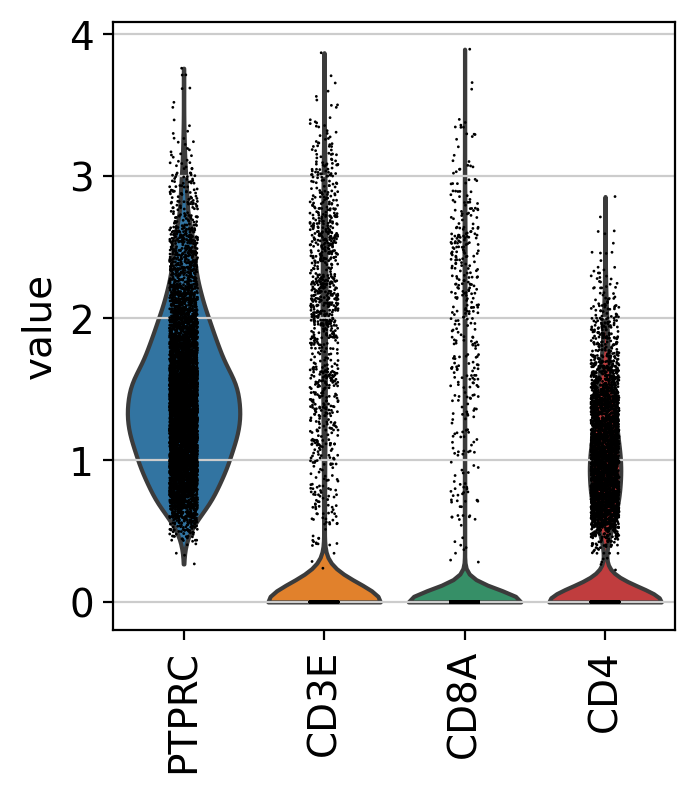

In [16]:
sc.pl.violin(Part0_C, keys=['PTPRC','CD3E','CD8A','CD4'],  rotation=90)

# Part0_E_ImportDataFromGliomaLocati

In [17]:
Part0_E = Part0_E[Part0_E.obs['SampleID'].isin(['GLIO1_T',
'GLIO3_T',
'GLIO4_T',
'GLIO6_T',
'GLIO7_T']),:]

In [18]:
Part0_E.X = Part0_E.layers['raw'].A

In [19]:
Part0_E.obs = Part0_E.obs[['SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis',
       'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'CellCount',
       'Sample', 'Sex', 'Age', 'Sorted']]

In [20]:
Part0_E.obs['Cohort'] = "PMID36703985" 

In [21]:
Part0_E.obs['Sample'] = Part0_E.obs['Sample'].map({'Patient19':'Patient6',
                                                  'Patient20':'Patient7',
                                                  'Patient21':'Patient8',
                                                  'Patient22':'Patient9',
                                                  'Patient23':'Patient10'})

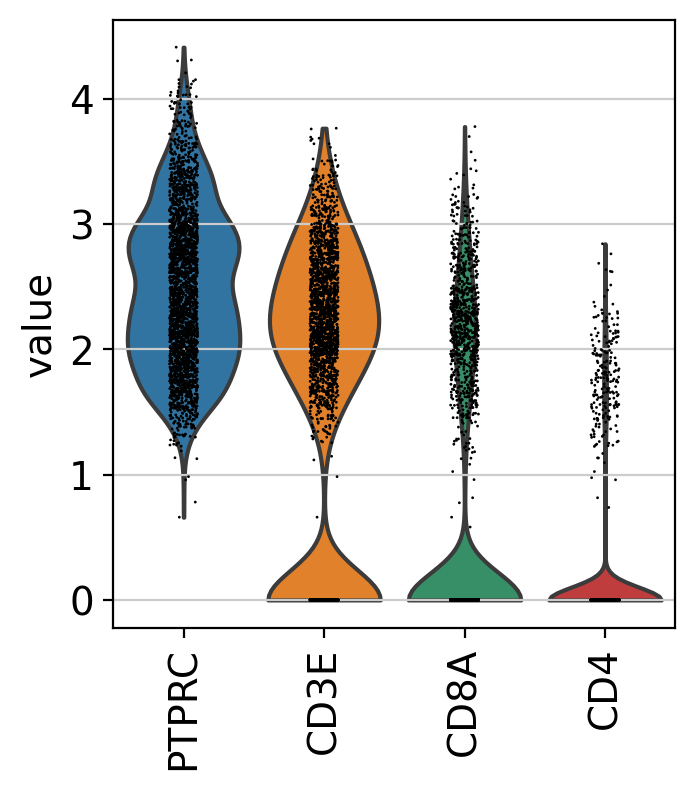

In [22]:
sc.pl.violin(Part0_E, keys=['PTPRC','CD3E','CD8A','CD4'],  rotation=90)

# Part0_G_ImportDataFromJoyce

In [23]:
Part0_G.X = Part0_G.layers['raw'].A

In [24]:
sc.pp.normalize_total(Part0_G, target_sum=1e4)
sc.pp.log1p(Part0_G)

In [25]:
Part0_G.obs = Part0_G.obs[['SampleID', 'Type', 'Diagnosis', 'Sample', 'Sorted']]

In [26]:
Part0_G.obs['Cohort'] = "PMID37217652"

In [27]:
Part0_G.obs['Sample'] = Part0_G.obs['Sample'].map({'Patient25':'Patient11',
                                                  'Patient26':'Patient12',
                                                  'Patient27':'Patient13'})

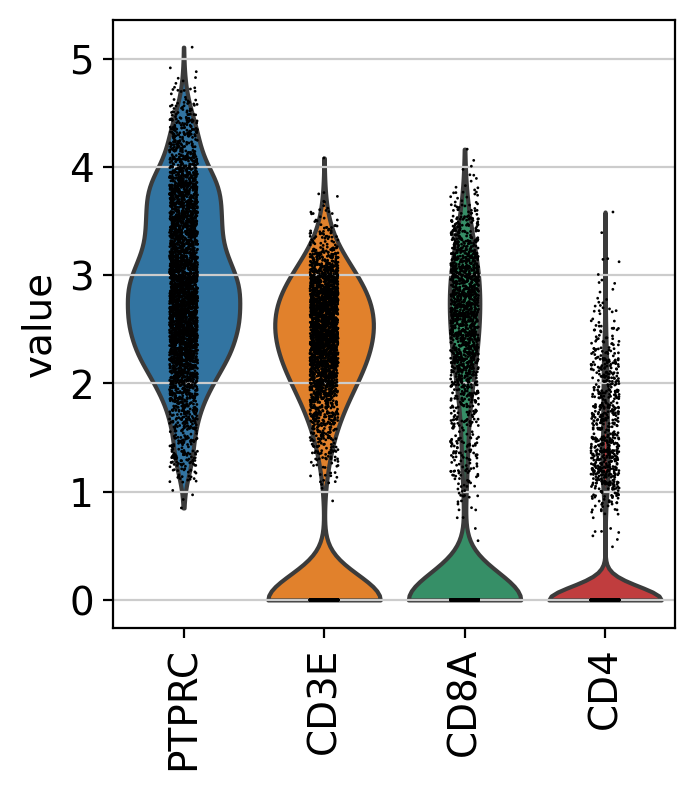

In [28]:
sc.pl.violin(Part0_G, keys=['PTPRC','CD3E','CD8A','CD4'],  rotation=90)

# Part0_L_PMID35177622

In [29]:
Part0_L.X = Part0_L.layers['raw']

In [30]:
sc.pp.normalize_total(Part0_L, target_sum=1e4)
sc.pp.log1p(Part0_L)

In [31]:
Part0_L.obs = Part0_L.obs[['SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis',
       'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'CellCount',
       'Sample', 'Sex', 'Age', 'Sorted']]

In [32]:
Part0_L.obs['Cohort'] = "PMID35177622"

In [33]:
Part0_L.obs['Sample'] = Part0_L.obs['Sample'].map({'Patient28':'Patient14',
                                                  'Patient29':'Patient15',
                                                  'Patient30':'Patient16',
                                                  'Patient31':'Patient17',
                                                  'Patient32':'Patient18',
                                                  'Patient33':'Patient19',
                                                  'Patient34':'Patient20',
                                                  'Patient35':'Patient21'})

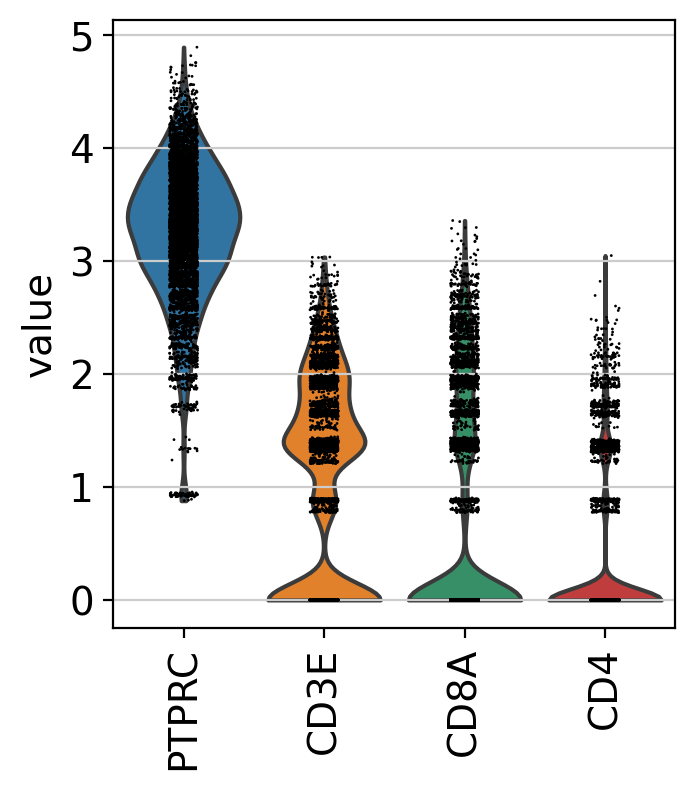

In [34]:
sc.pl.violin(Part0_L, keys=['PTPRC','CD3E','CD8A','CD4'],  rotation=90)

# Part0_N_GSE147275_PMID34138753

In [35]:
Part0_N.X = Part0_N.layers['raw']

In [36]:
Part0_N.obs = Part0_N.obs[['SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis',
       'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'CellCount',
       'Sample', 'Sex', 'Age', 'Sorted']]

In [37]:
Part0_N.obs['Sample'] = Part0_N.obs['Sample'].map({'Patient36':'Patient22',
                                                  'Patient38':'Patient23',
                                                  'Patient39':'Patient24'})

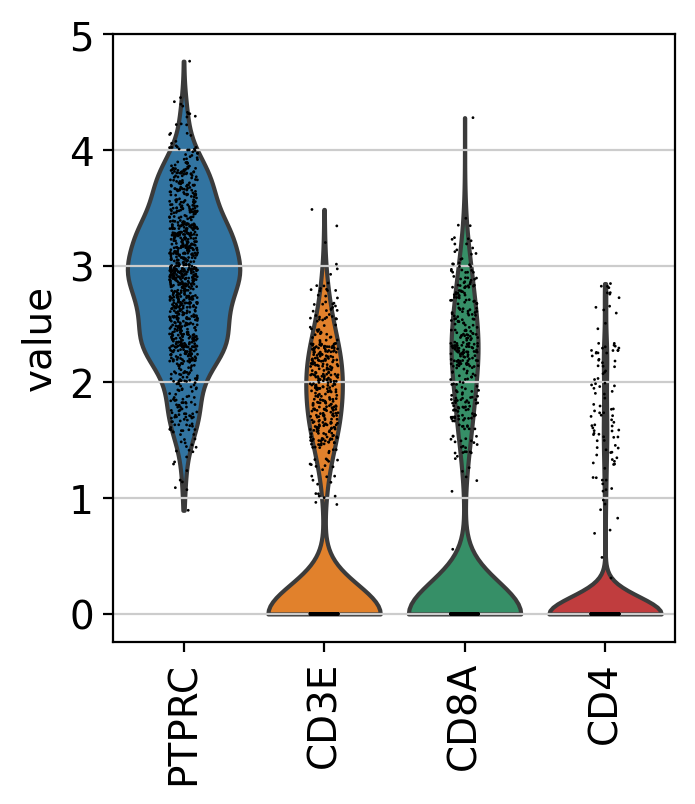

In [38]:
sc.pl.violin(Part0_N, keys=['PTPRC','CD3E','CD8A','CD4'],  rotation=90)

# Part0_O_GSE182109_PMID35140215

In [39]:
Part0_O.X = Part0_O.layers['raw']

In [40]:
sc.pp.normalize_total(Part0_O, target_sum=1e4)
sc.pp.log1p(Part0_O)

In [41]:
Part0_O = Part0_O[Part0_O.obs['SampleID'].isin(['CNSTM_397',
 'CNSTM_394',
 'CNSTM_390',
 'CNSTM_379',
 'CNSTM_375',
 'CNSTM_096',
 'CNSTM_068','MDAG_09','MDAG_12','MDAG_6','MDAG_10','MDAG_4']),:]

In [42]:
Part0_O.obs['Sample'] = Part0_O.obs['Sample'].map({'Patient40':'Patient25',
                                                  'Patient41':'Patient26',
                                                  'Patient42':'Patient27',
                                                  'Patient43':'Patient28',
                                                  'Patient44':'Patient29',
                                                  'Patient45':'Patient30',
                                                  'Patient46':'Patient31',
                                                  'Patient48':'Patient33',
                                                  'Patient49':'Patient35',
                                                  'Patient51':'Patient34', 
                                                  'Patient52':'Patient32', 
                                                  'Patient53':'Patient36', 
                                                  })

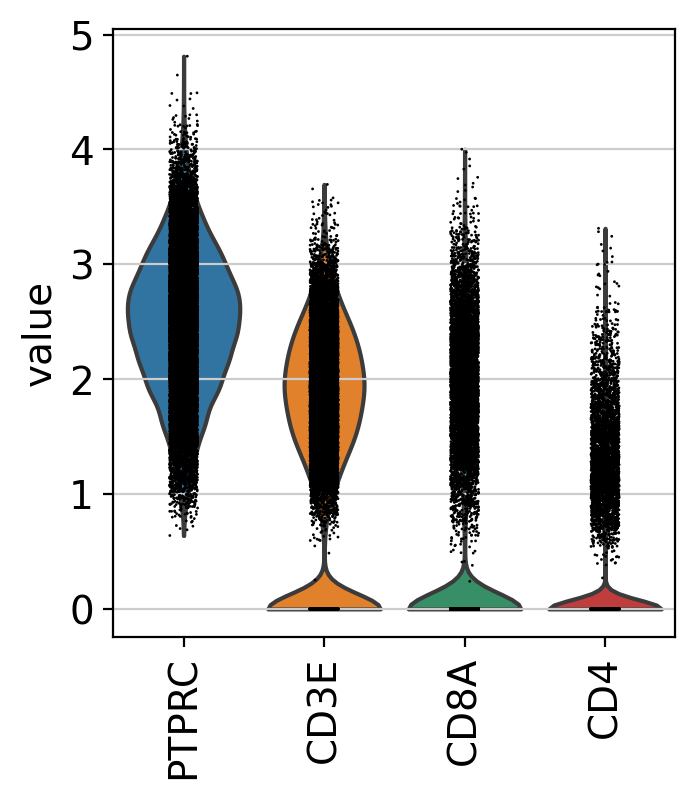

In [43]:
sc.pl.violin(Part0_O, keys=['PTPRC','CD3E','CD8A','CD4'],  rotation=90)

# Part0_R_SCP503_PMID35122077

In [44]:
Part0_R.X = Part0_R.layers['raw']

In [45]:
sc.pp.normalize_total(Part0_R, target_sum=1e4)
sc.pp.log1p(Part0_R)

In [46]:
Part0_R.obs = Part0_R.obs[['SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis',
       'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'CellCount',
       'Sample', 'Sex', 'Age', 'Sorted']]

In [47]:
Part0_R = Part0_R[Part0_R.obs['SampleID'].isin(['G620_T','G946_T','G910_T','G967_T','G983_T'
                                               ]),:]

In [48]:
Part0_R.obs['Sample'] = Part0_R.obs['Sample'].map({'Patient115':'Patient37',
                                                  'Patient117':'Patient38',
                                                  'Patient118':'Patient39',
                                                  'Patient119':'Patient40',
                                                  'Patient120':'Patient41'})

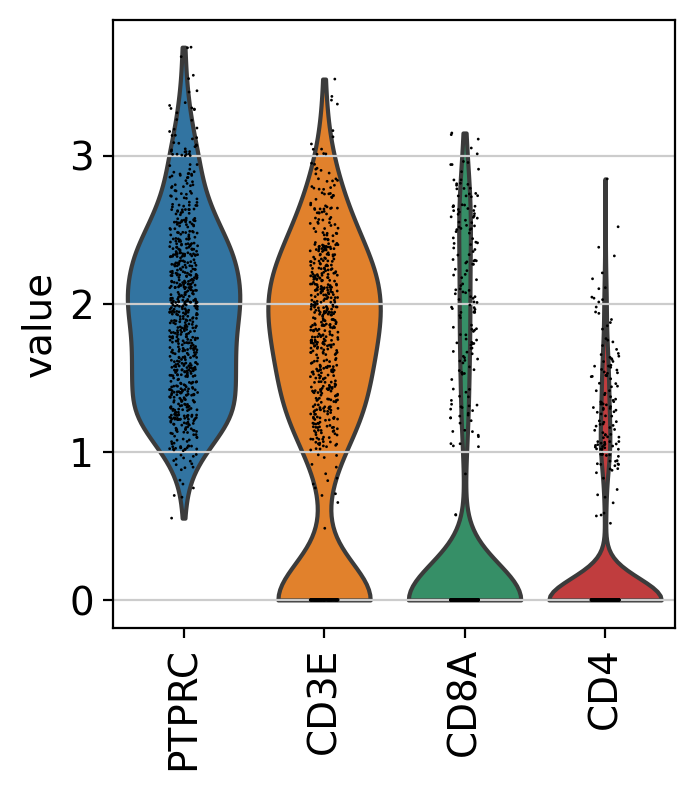

In [49]:
sc.pl.violin(Part0_R, keys=['PTPRC','CD3E','CD8A','CD4'],  rotation=90)

# Part0_S_GSE131928_PMID31327527

In [50]:
Part0_S.X = Part0_S.layers['raw']

In [51]:
Part0_S.obs = Part0_S.obs[['SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis',
       'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'CellCount',
       'Sample', 'Sex', 'Age', 'Sorted']]

In [52]:
Part0_S.obs['Sample'] = Part0_S.obs['Sample'].map({'Patient61':'Patient42',
                                                  'Patient62':'Patient43',
                                                  'Patient63':'Patient44',
                                                  'Patient64':'Patient45',
                                                  'Patient65':'Patient46'})

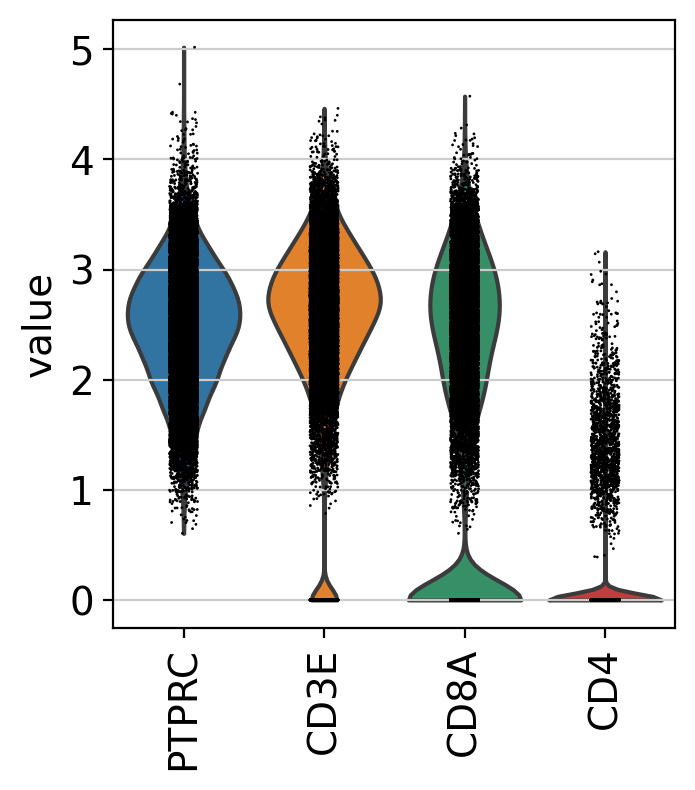

In [53]:
sc.pl.violin(Part0_S, keys=['PTPRC','CD3E','CD8A','CD4'],  rotation=90)

In [54]:
Part0_C.shape

(6369, 33694)

In [55]:
Part0_E.shape

(2766, 33538)

In [56]:
Part0_G.shape

(3867, 36601)

In [57]:
Part0_L.shape

(7138, 26615)

In [58]:
Part0_N.shape

(993, 33538)

In [59]:
Part0_O.shape

(19695, 38224)

In [60]:
Part0_R.shape

(734, 17647)

In [61]:
Part0_S.shape

(21819, 33538)

# Concatenation

In [62]:
adata = Part0_C.concatenate([Part0_E,Part0_G,Part0_L,Part0_N,Part0_O,Part0_R,Part0_S],index_unique=None,
                          join = 'outer')

In [63]:
adata

AnnData object with n_obs × n_vars = 63381 × 49655
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'batch'
    var: 'gene_ids-0', 'ENSGeneID-1', 'ENSGeneID-2', 'gene_ids-4', 'feature_types-4', 'genome-4', 'gene_ids-0-5', 'feature_types-0-5', 'gene_ids-1-5', 'feature_types-1-5', 'gene_ids-10-5', 'feature_types-10-5', 'gene_ids-11-5', 'feature_types-11-5', 'gene_ids-0-12-5', 'feature_types-0-12-5', 'gene_ids-1-12-5', 'feature_types-1-12-5', 'gene_ids-2-12-5', 'feature_types-2-12-5', 'gene_ids-3-12-5', 'feature_types-3-12-5', 'gene_ids-13-5', 'feature_types-13-5', 'gene_ids-2-5', 'feature_types-2-5', 'gene_ids-3-5', 'feature_types-3-5', 'gene_ids-4-5', 'feature_types-4-5', 'gene_ids-5-5', 'feature_types-5-5', 'gene_ids-6-5', 'feature_types-6-5', 'gene_ids-7-5', 'feature_types-7-5', 'gene_ids-8-5', 'feature_types-8-5', 'gene_ids-9-5', 'feature_types-9-5', 'gene_ids-7'

In [64]:
adata.layers['log1'] = adata.X 

# Fix Gene Annotation

In [65]:
pd.DataFrame(adata.var.index).to_csv("/home/lugli/spuccio/Projects/SP039/GMB_revisionSept2023/H5ad/Lista_geni.csv",
                                    sep="\t",header=True,index=False)

# Import gene annotation for Biomart

In [66]:
gene_annotation = pd.read_csv("/home/lugli/spuccio/Projects/SP039/GMB_revisionSept2023/H5ad/mart_export.txt",sep="\t")

In [67]:
gene_annotation.head()

,Gene name,Gene type,Gene description
0,MT-TF,Mt_tRNA,mitochondrially encoded tRNA-Phe (UUU/C) [Sour...
1,MT-RNR1,Mt_rRNA,mitochondrially encoded 12S rRNA [Source:HGNC ...
2,MT-TV,Mt_tRNA,mitochondrially encoded tRNA-Val (GUN) [Source...
3,MT-RNR2,Mt_rRNA,mitochondrially encoded 16S rRNA [Source:HGNC ...
4,MT-TL1,Mt_tRNA,mitochondrially encoded tRNA-Leu (UUA/G) 1 [So...


# Merge and filtering with object

In [68]:
tmp = pd.merge(pd.DataFrame(adata.var.index),gene_annotation,left_on=0,right_on="Gene name")

In [69]:
adata_ = adata[:,adata.var.index.isin(tmp['Gene name'])]

In [70]:
tmp_ = tmp.loc[tmp['Gene name'].isin(adata_.var.index)]

In [71]:
del tmp_[0]

In [72]:
tmp_ = tmp_.drop_duplicates(subset="Gene name")

In [73]:
del adata_.var

In [74]:
adata_.var= tmp_.set_index("Gene name")

In [75]:
# Filter 1

In [76]:
sc.pp.filter_genes(adata_, min_cells=3)

In [77]:
# Keep only protein coding

In [78]:
adata = adata_[:,adata_.var['Gene type'].isin(["protein_coding"])]

# Check Doublet

In [79]:
adata.layers['log1'].A.max()

8.614623

In [80]:
#sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 55.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.6%
Elapsed time: 101.1 seconds


225

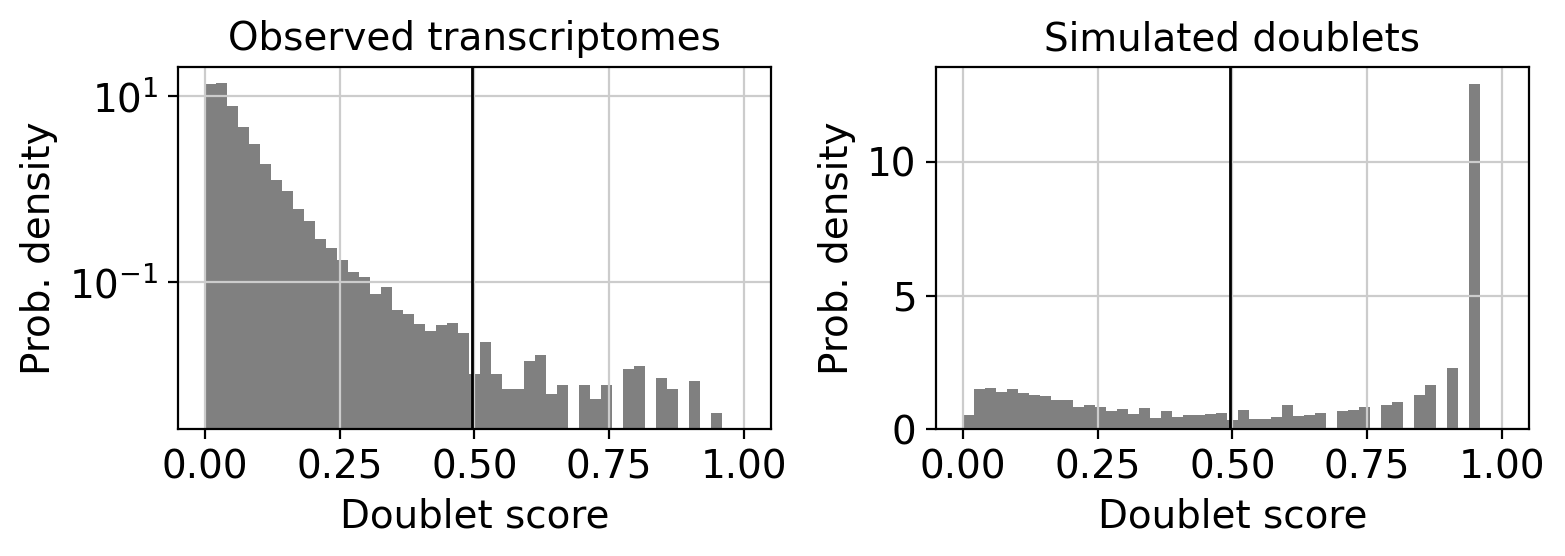

In [81]:
import scrublet as scr
scrub = scr.Scrublet(adata.layers['log1'])
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata.obs['predicted_doublets'])

In [82]:
# add in column with singlet/doublet instead of True/False
adata.obs['doublet_info'] = adata.obs["predicted_doublets"].astype(str)
#sc.pl.violin(adata, 'n_genes_by_counts',jitter=0.4, groupby = 'doublet_info', rotation=45)

In [83]:
adata = adata[adata.obs['doublet_info'] == "False",:]

In [84]:
adata

View of AnnData object with n_obs × n_vars = 63156 × 16582
    obs: 'SampleID', 'GEO_RNA', 'Cohort', 'Type', 'Subtype', 'Diagnosis', 'Grade', 'Location', 'IDH1_Status', 'EGFR_Status', 'CellCount', 'Sample', 'Sex', 'Age', 'Sorted', 'batch', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'Gene type', 'Gene description', 'n_cells'
    layers: 'log', 'raw', 'log1'

# Remove Mito and Robo genes

In [85]:
#Identify mitochondrial genes
mito_genes = adata.var_names.str.startswith('MT-').tolist()
#Identify ribosomal protein genes using a pre-compiled list
#Remove mitochondrial genes protein genes
adata_no_mito_RB = adata[:, [gene not in mito_genes for gene in adata.var.index]].copy()

In [86]:
print(adata_no_mito_RB.n_obs, adata_no_mito_RB.n_vars)
malat1 = adata_no_mito_RB.var_names.str.startswith('MALAT1')
ribo_genes = adata_no_mito_RB.var_names.str.startswith(("RPL","RPS"))
remove = np.add(ribo_genes, malat1)
keep = np.invert(remove)
adata_no_mito_RB = adata_no_mito_RB[:,keep]
print(adata_no_mito_RB.n_obs, adata_no_mito_RB.n_vars)

63156 16582
63156 16482


In [87]:
adata_no_mito_RB.write("/home/lugli/spuccio/Projects/SP039/GMB_revisionSept2023/H5ad/Part1_raw_data_after_QC.h5ad")